# Deep Hedging AI
### Example showing TensorBoard

Hans Buehler, January 2023


In [1]:
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
!pip -q install cdxbasics "tensorflow>=2.10" "tensorflow_probability==0.14"
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
if i!=-1:
    p = p[:i]
    import sys
    sys.path.append(p)
    print("SageMaker: added python path %s" % p)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hansb\\Anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Deep Hedging AI says hello ... Tensorflow version 2.10.0 running on 1 CPUs and 0 GPUs
Gym with 944 trainable weights compiled and initialized. Took 8s
Agent is using 942 weights: 941 for the main agent per step, 1 for initial delta.
 Features available per time step:     action, cost, delta, ivol, lbnd_a, pnl, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used per time step:          delta, price and time_left
 Features available for initial delta: cost, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used by initial delta:       -
Monetary utility cvar@1 is using 1 weight
 Features available: cost, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used:      -
Training monitor initialized. Took 0s
TensorBoard log directory set to 'C:/Users/hansb/.tensorboard/'. Took 0s
Deep Hedging Engine: first of 10 epochs for training 944 weights over 1000 samples with 1000 validation samples started. This training run took 1s so far. 

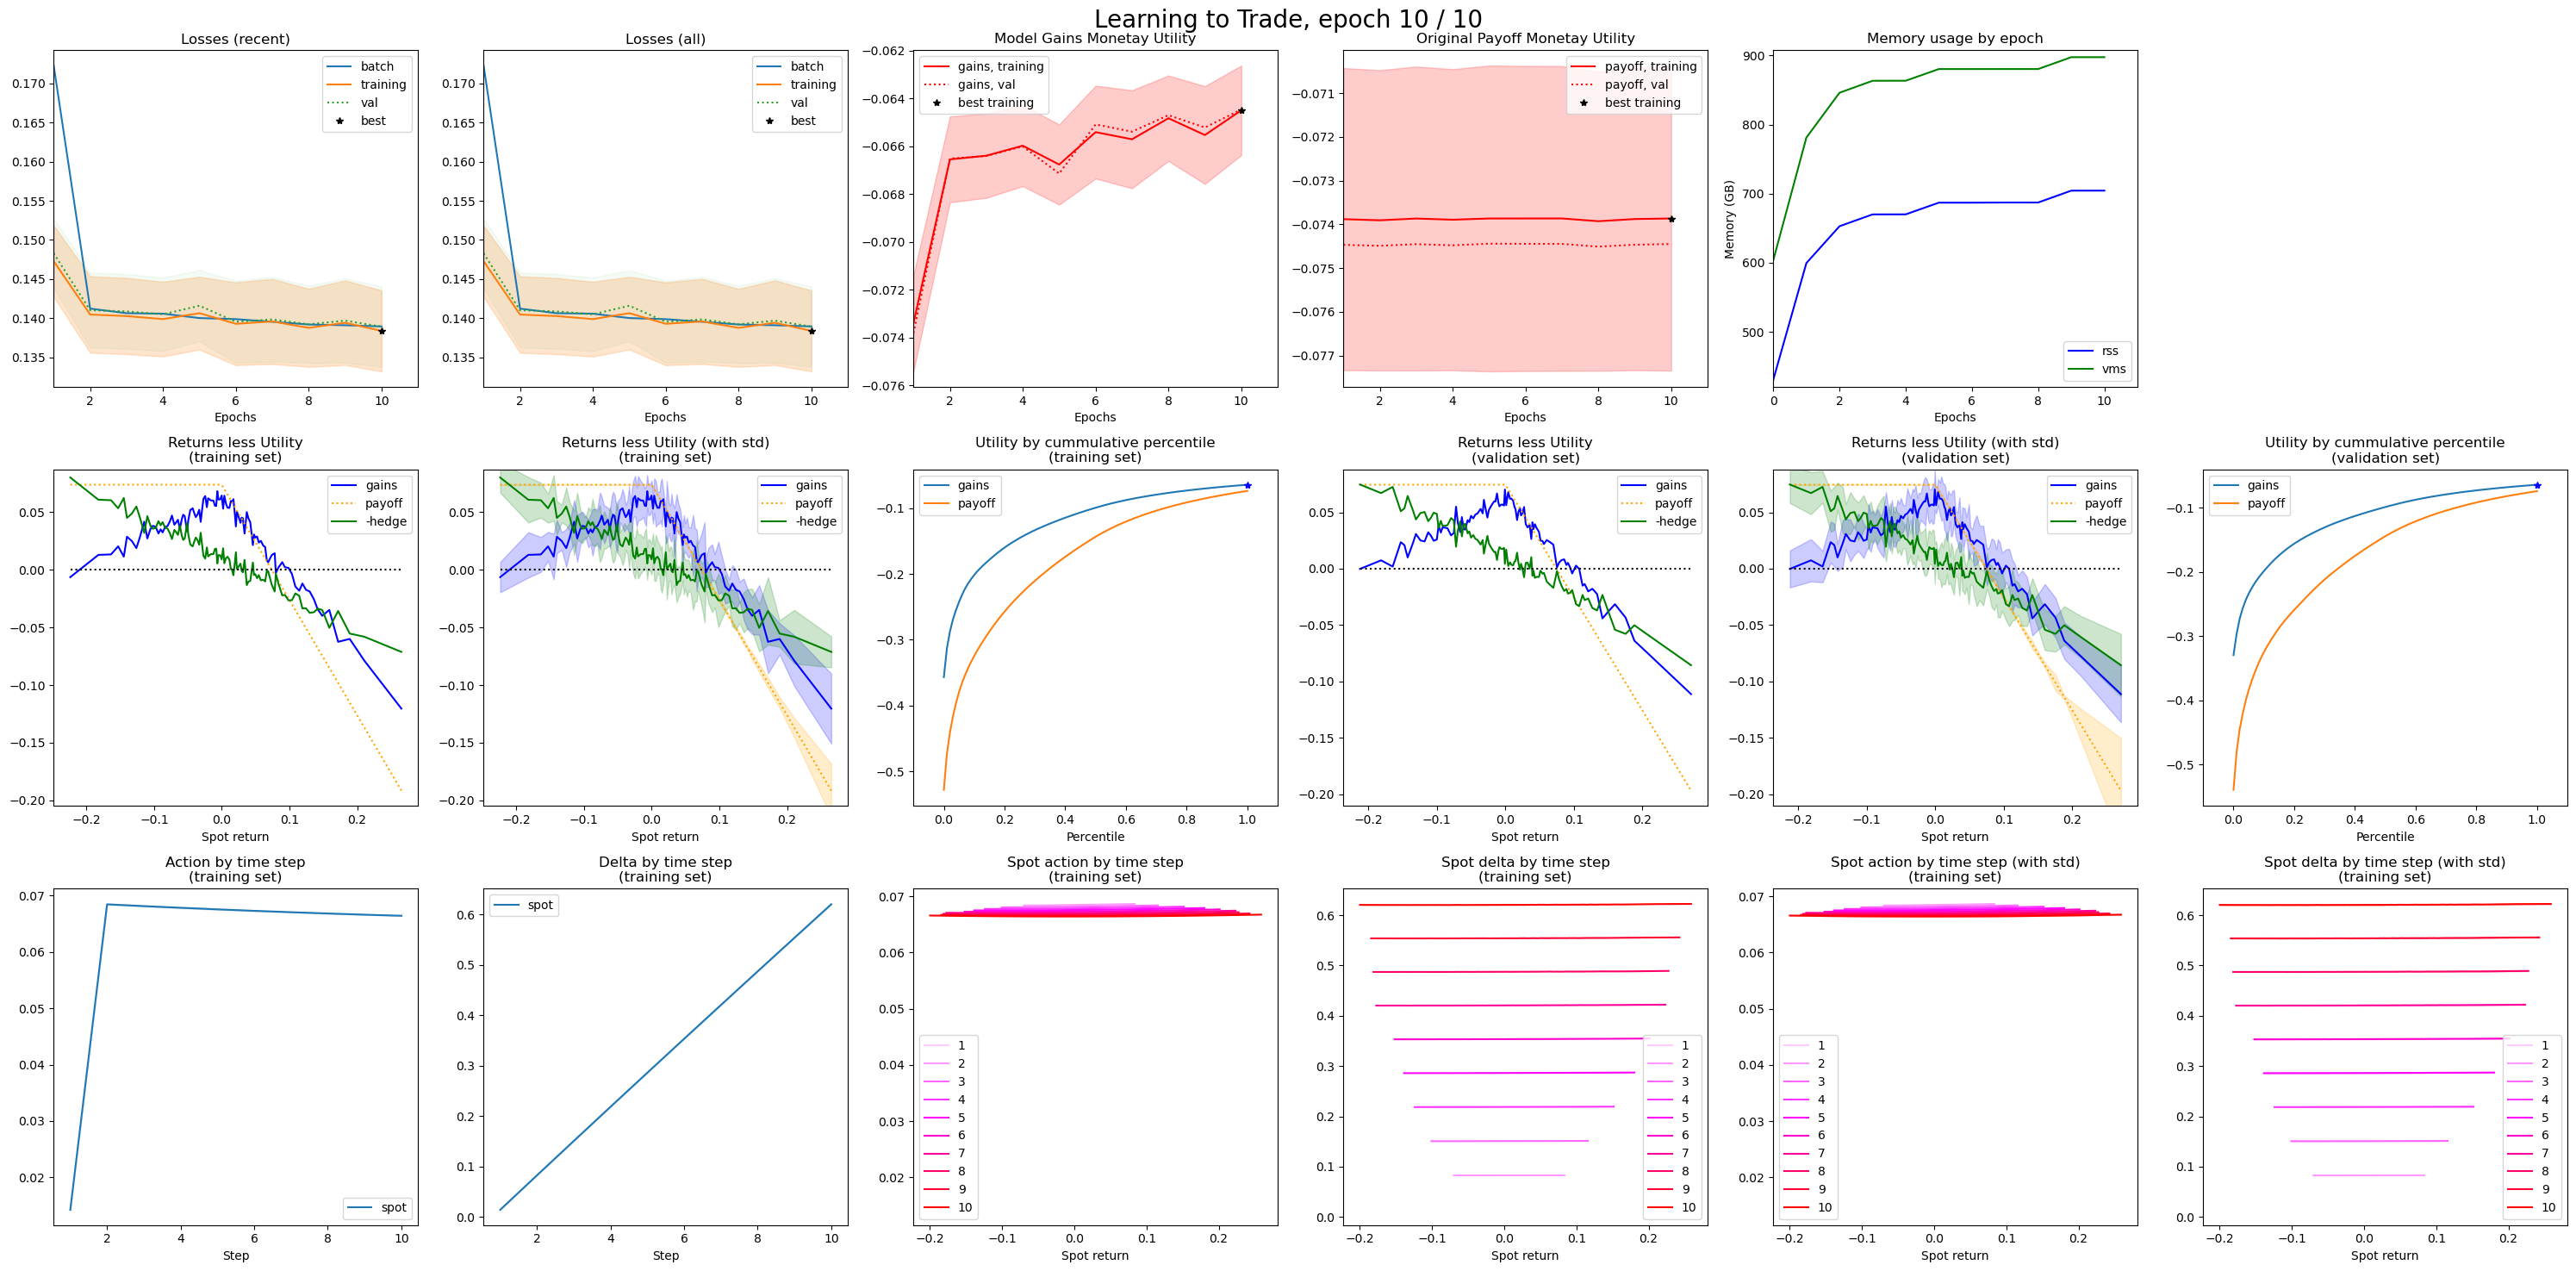

Training 10/10 epochs; 944 weights; 1000 samples; 1000 validation samples batch size 32 | initial loss 0.262135 (0.0122854), training 0.138364 (0.00517678), best 0.138364 (0.0122854), batch 0.138939, val 0.138914 (0.0051301). Best epoch 10. | memory used: rss 704.363M, vms 897.422M | time elapsed 26s; time per epoch 2s; estimated time remaining 0s                          
 Status: Training complete.
 Weights set to best epoch: 10

Training terminated. Total time taken 1:12


In [2]:
%matplotlib inline
print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from cdxbasics.subdir import SubDir
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 1000
config.world.steps = 10
config.world.black_scholes = True
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 10
config.trainer.visual.epoch_refresh = 2
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

# tensor board
# ------------
config.trainer.caching.mode = "off"  # caching makes no sense here
board_dir = SubDir("~/.tensorboard").path
config.trainer.train.tensor_board.log_dir = board_dir
config.trainer.train.tensor_board.hist_freq = 1
config.trainer.train.tensor_board.profile_batch  = '1,10'

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=config.world("samples"))

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
config.done()



### TensorBoard

In [3]:
# Load the TensorBoard notebook extension.
%reload_ext tensorboard
# Launch TensorBoard and navigate to the Profile tab to view performance profile

%tensorboard --logdir=board_dir



Reusing TensorBoard on port 6006 (pid 41456), started 0:42:57 ago. (Use '!kill 41456' to kill it.)

In [4]:
#!kill 41456